<h1>Bank Marketing Dataset (bank-additional-full)</h1>

<b>Topic</b>: Direct marketing campaigns of a bank to make clients subscribe a bank term deposit.<br>

PRIVACY LIMTATION: This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). <br>
DATASET: bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

bankdf = pd.read_csv("datasets/bank-additional-full.csv", sep=";")
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h1>FEATURE ENGINEERING</h1>

- Year: does it make sense to derive a year column to complete the date? Can be derived knowing that data are ordered. 
- Education: just one big basic class instead of all years?
- Duration: in minutes instead of seconds?


In [4]:
# CREATION OF YEAR VARIABLE

nemployed = bankdf['nr.employed']

unique, index = np.unique(nemployed, return_index=True) # [5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]

# 2008: 5191. , 5228.1, 5195.8
# 2009: 5176.3, 5099.1, 5076.2, 5017.5
# 2010: 5023.5, 5008.7, 4991.6, 4963.6

year_df = {'year':['2008','2008','2008','2009','2009','2009','2009','2010','2010','2010','2010'], 
           'nr.employed':[5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]}
year_df = pd.DataFrame.from_dict(year_df)

bankdf = bankdf.merge(year_df, on='nr.employed', how='left')

In [5]:
# Creating a function to convert the month abbrevuation in number

bankdf["month_name"] = bankdf["month"]

def convert_month(df):
    df['month'] = [int(datetime.datetime.strptime(obv, '%b').month) for obv in df['month_name']]
    df['year'] = [int(obv) for obv in df['year']]
convert_month(bankdf)




<h1>DESCRIPTION OF DATASET, CORRELATION MATRIX, PAIRPLOT and DESCRIPTION OF CATEGORICAL VARS</h1>

1) Describe() is used to provide descriptive statistics of the numerical variables in the dataset<br>
2) Correlation Heatmap: correlation of the numerical variables. Orange means positive correlation, Blue means negative correlation.<br>
3) PairPLot: scatterplots of the pairs of numerical variables, in the diagonal there is a KDE.<br>
4) Categorical Variables Description

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

In [28]:
#bankdf.info() # 41188  rows × 21 columns, 20 features and 1 target variable
bankdf.describe()  # statistics of numerical data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
# Description of Categorical Variables
bankdf.describe(include=['object']) # categorical variables

,job,marital,education,default,housing,loan,contact,day_of_week,poutcome,y,month_name
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,5,3,2,10
top,admin.,married,university.degree,no,yes,no,cellular,thu,nonexistent,no,may
freq,10422,24928,12168,32588,21576,33950,26144,8623,35563,36548,13769


Text(0.5, 1.0, 'Correlation Heatmap')

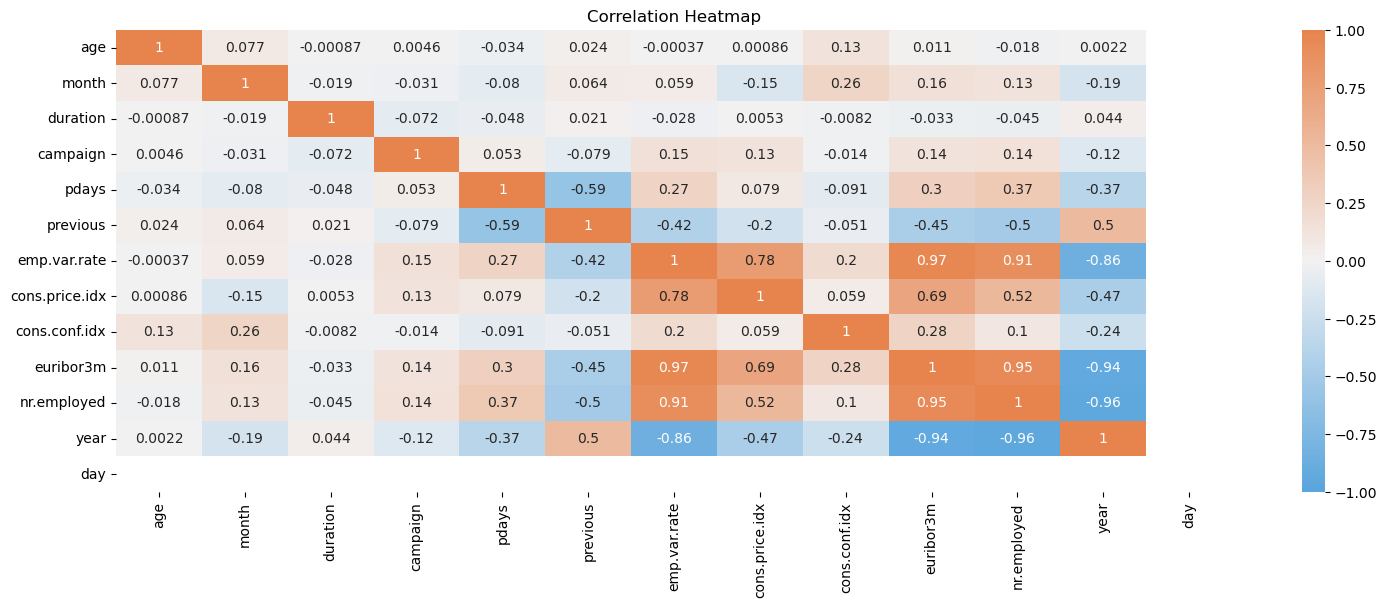

In [207]:
plt.figure(figsize=(18, 6))

pal2 = sns.diverging_palette(240, 30, l=65, as_cmap=True)

heatmap = sns.heatmap(bankdf.corr(), vmin=-1, vmax=1, annot=True,cmap=pal2)
heatmap.set_title('Correlation Heatmap')

C:\Users\alida\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


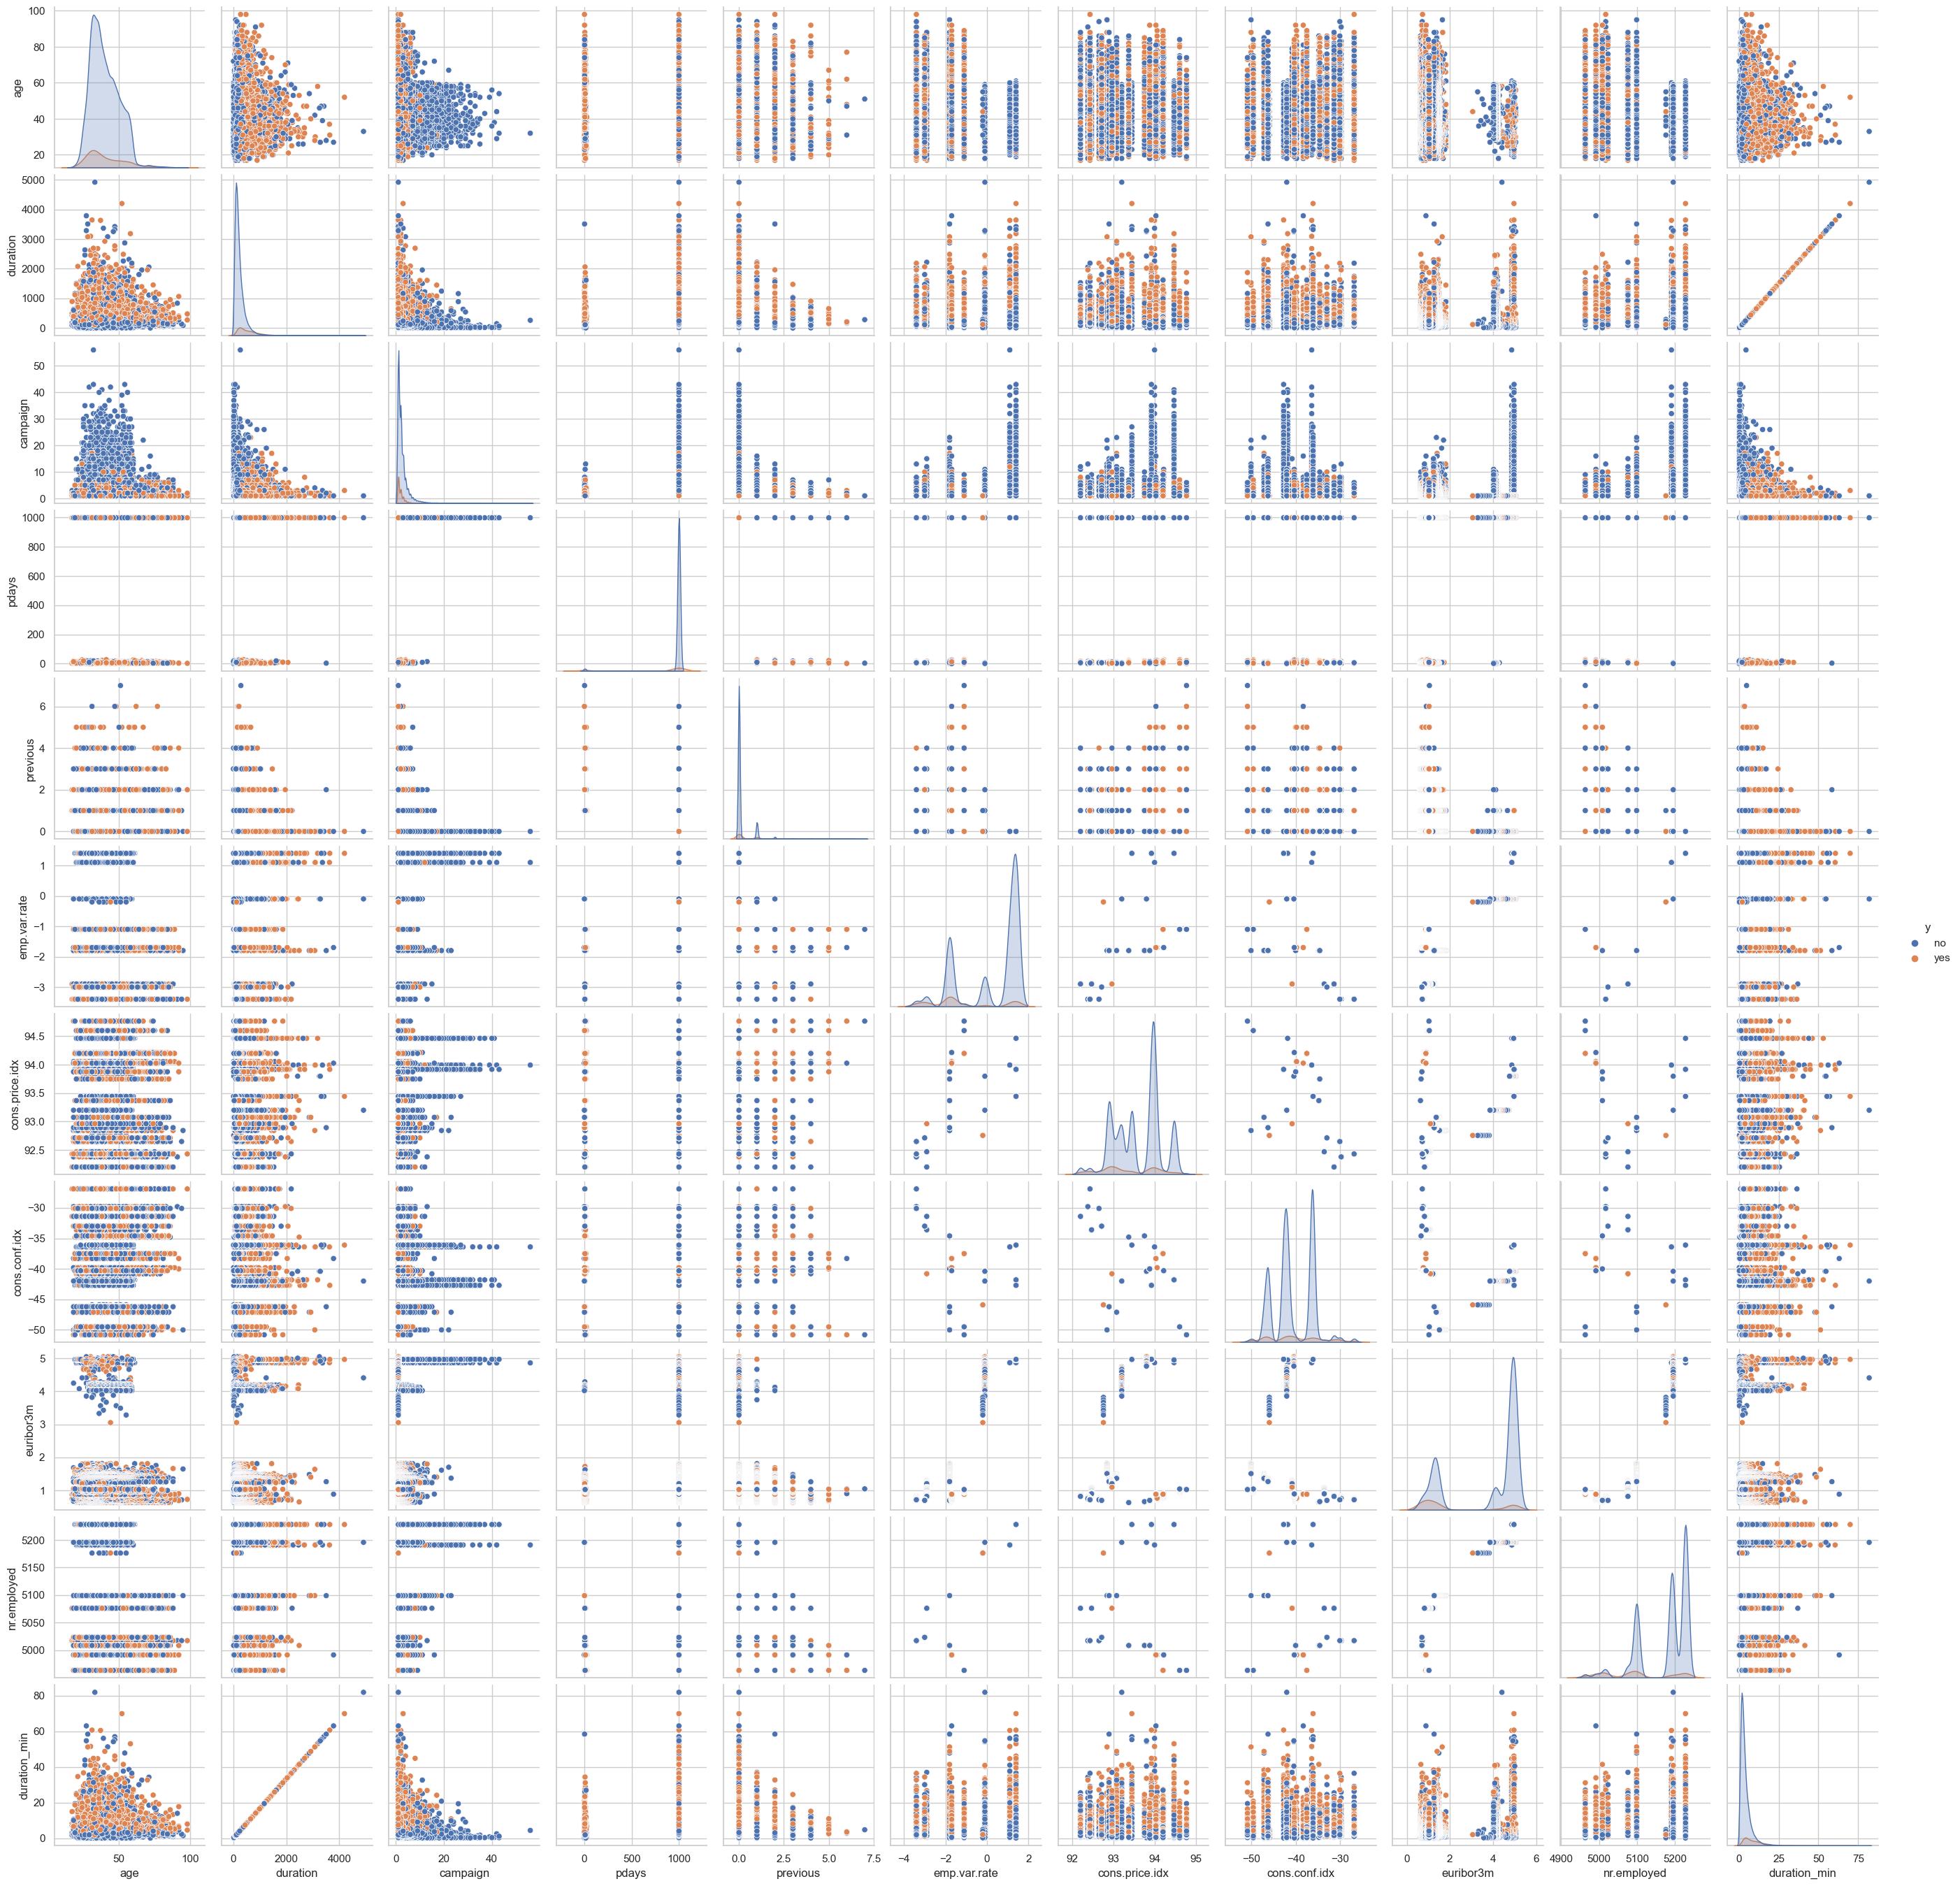

In [118]:
# ATTENTION TO THIS!!! TAKES A LOT OF TIME!!!

# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

sns.pairplot(bankdf, hue="y", diag_kind = 'kde')

<h1>VISUALIZATION: Numerical variables</h1>

<Axes: xlabel='Date'>

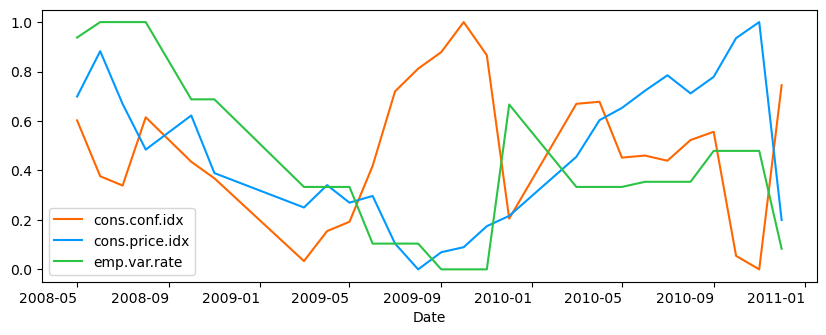

In [6]:
# FLUCTUATIONS OF 3 ECONOMIC FEATURES; STANDARDIZED
pal = [ "#ff6600", "#0099ff", "#2BC344"]
sns.set_palette(pal)

bankdf["day"] = int(1)
bankdf['date']=pd.to_datetime(bankdf[['year','month','day']])

scaler = preprocessing.MinMaxScaler()
dfp = pd.pivot_table(data=bankdf, index='date', values=["cons.price.idx", "emp.var.rate","cons.conf.idx"], 
                     aggfunc='first')

dfp[:] = scaler.fit_transform(dfp)

dfp.plot(figsize=(10, 4), ylabel='', xlabel='Date', rot=0) #with standardized data. looking at fluctuations over time



<Axes: xlabel='age', ylabel='Density'>

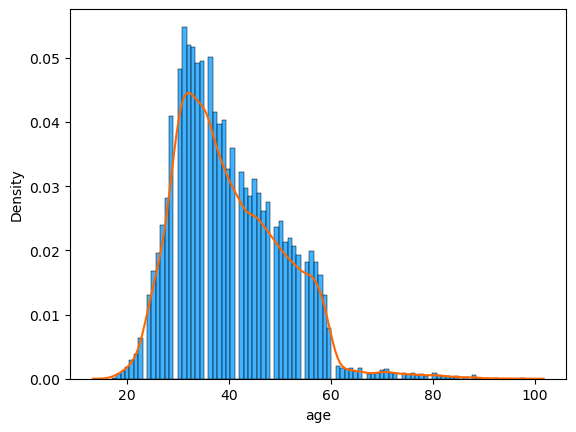

In [260]:
# Age

ax = sns.histplot(data=bankdf, x="age", kde=False, stat='density', color="#0099ff")
sns.kdeplot(data=bankdf, x="age", color="#ff6600", ax=ax)

<Axes: xlabel='duration', ylabel='Density'>

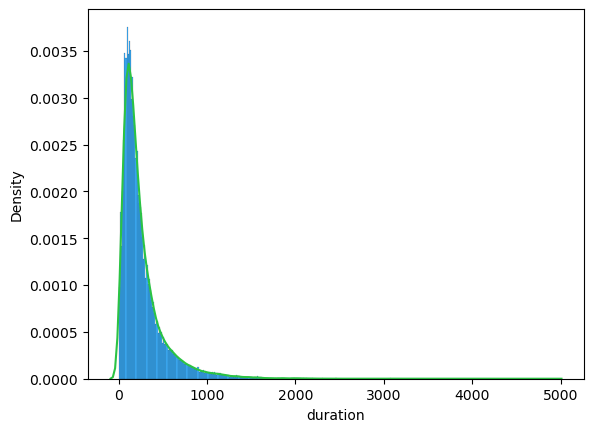

In [264]:
# Duration

ax = sns.histplot(bankdf["duration"], kde=False, stat='density', color="#0099ff")
sns.kdeplot(bankdf["duration"], color="#2BC344", ax=ax)

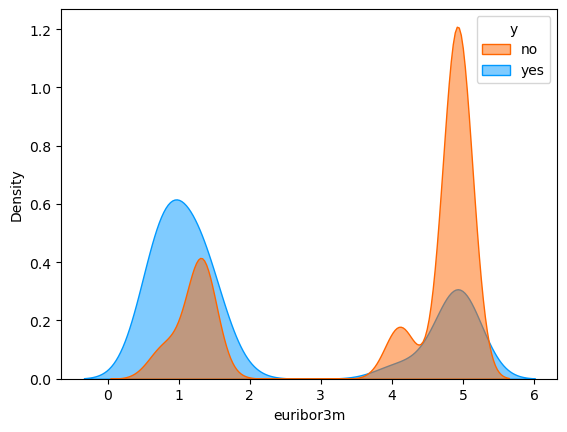

In [12]:
# Density plot with euribor3m and y outcome. Interesting.


sns.kdeplot(data=bankdf, x="euribor3m", hue="y", fill=True, common_norm=False, alpha=.5)
plt.show()

C:\Users\alida\AppData\Local\Temp\ipykernel_15168\8030790.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.kdeplot(data=bankdf, x="duration", hue="y", fill=True, common_norm=False, palette=pal, alpha = 0.5)


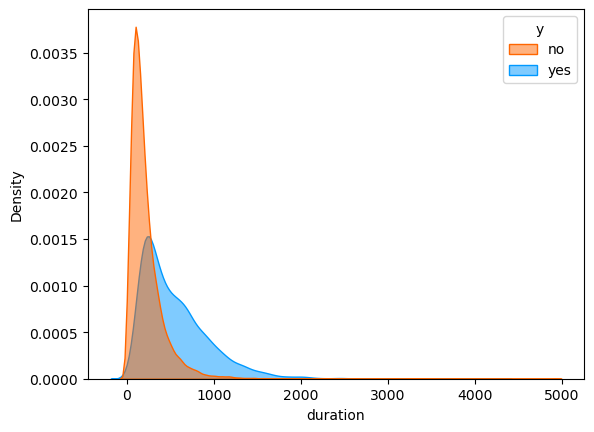

In [13]:
# VISUALIZATION: y and DURATION

sns.kdeplot(data=bankdf, x="duration", hue="y", fill=True, common_norm=False, palette=pal, alpha = 0.5)
plt.show()

<h1>VISUALIZATION: Categorical variables</h1>

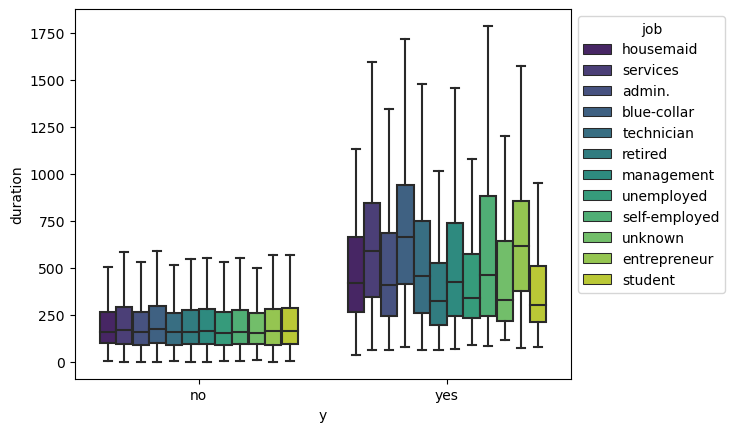

In [6]:
# Boxplot: duration, job and y

ax = sns.boxplot(data=bankdf, x="y", y="duration", hue="job", showfliers=False, palette = "viridis") # ATTENTION not showing outliers
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<Axes: xlabel='marital', ylabel='age'>

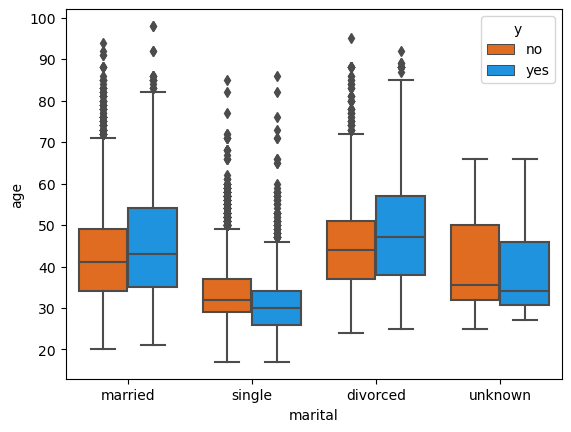

In [7]:
# Boxplot: marital status, age and outcome (y)
sns.boxplot(data=bankdf, x="marital", y="age", hue="y")

In [8]:
# Table of poutcome vs y

tab = pd.crosstab(index=bankdf["poutcome"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All","All"]

row = tab_per.index.get_level_values(0)

tab_per.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))


y,no,yes,All
poutcome,,,
failure,0.088545,0.014689,0.103234
nonexistent,0.787171,0.076260,0.863431
success,0.011630,0.021705,0.033335
All,0.887346,0.112654,1.000000


In [10]:
tab = pd.crosstab(index=bankdf["education"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All",]


row = tab_per.index.get_level_values(0)

tab_per.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))

y,no,yes,All
education,,,
basic.4y,0.102550,0.092241,0.101389
basic.6y,0.057568,0.040517,0.055647
basic.9y,0.152457,0.101940,0.146766
high.school,0.232133,0.222198,0.231014
illiterate,0.000383,0.000862,0.000437
professional.course,0.127175,0.128233,0.127294
university.degree,0.287239,0.359914,0.295426
unknown,0.040495,0.054095,0.042027
All,1.000000,1.000000,1.000000


In [11]:
tab = pd.crosstab(index=bankdf["default"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All",]


row = tab.index.get_level_values(0)

tab.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))

y,no,yes,All
default,,,
no,28391,4197,32588
unknown,8154,443,8597
yes,3,0,3
All,36548,4640,41188


<Axes: xlabel='year', ylabel='count'>

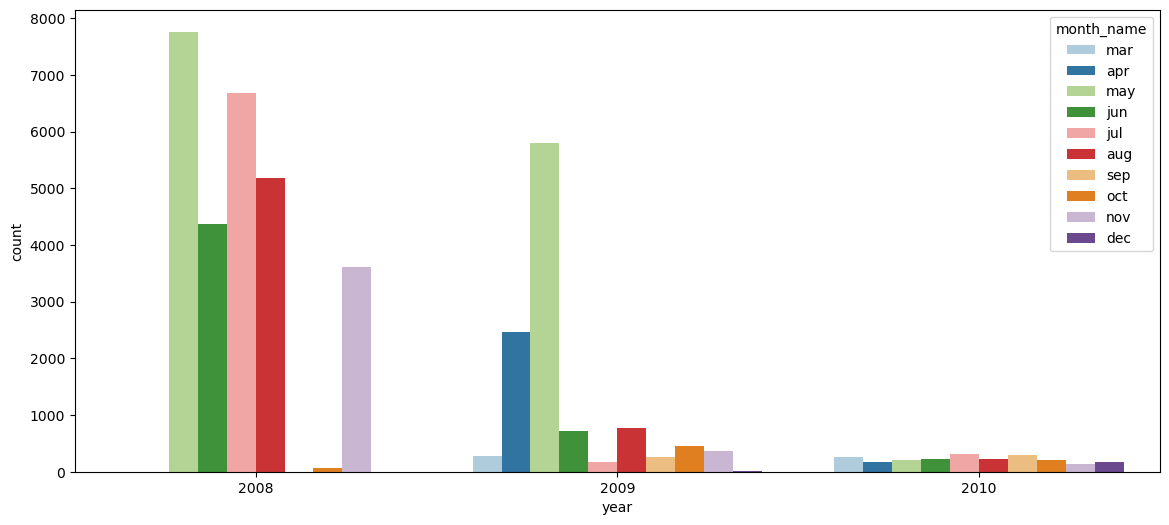

In [14]:
hue_order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
plt.figure(figsize=(14, 6))
sns.countplot(bankdf, x="year", hue="month_name", hue_order = hue_order, palette= "Paired")

<h1>PRE-PROCESSING</h1>

- Missing Values: no missing values, but some categorical variables have a class called "Unknown". What should be do with it? How many observations having the Unknown class? <br>
- Scaling: is standardization/normalization required? <br>
- Dummy variables: <br>
- Remove duplicate rows <br>
- Feature Engineering: already performed some operations before<br>
- Remove Columns: pdays? does not make sense. Almost everyone was not contacted before. Can remove it. Already know if have been contacted from the poutcome (nonexistent is not contacted).<br>

In [7]:
# Unknown count

#bankdf.nunique()
#bankdf.isnull().sum() # no NAs but there are some classes "Unknown", what should we do with them?

for column in bankdf.select_dtypes(include=object):
     print("\n" + column)
     print(bankdf[column].value_counts().to_markdown())
    
# job: 330 
# marital: 80
# education: 1731
# default: 8597
# housing 990
# loan: 990



job
|               |   job |
|:--------------|------:|
| admin.        | 10422 |
| blue-collar   |  9254 |
| technician    |  6743 |
| services      |  3969 |
| management    |  2924 |
| retired       |  1720 |
| entrepreneur  |  1456 |
| self-employed |  1421 |
| housemaid     |  1060 |
| unemployed    |  1014 |
| student       |   875 |
| unknown       |   330 |

marital
|          |   marital |
|:---------|----------:|
| married  |     24928 |
| single   |     11568 |
| divorced |      4612 |
| unknown  |        80 |

education
|                     |   education |
|:--------------------|------------:|
| university.degree   |       12168 |
| high.school         |        9515 |
| basic.9y            |        6045 |
| professional.course |        5243 |
| basic.4y            |        4176 |
| basic.6y            |        2292 |
| unknown             |        1731 |
| illiterate          |          18 |

default
|         |   default |
|:--------|----------:|
| no      |     32588 |


In [8]:
# Remove duplicates: from 41188 to 41176

bankdf = bankdf.drop_duplicates()
len(bankdf)

41176

In [9]:
# If y is yes, then 1 otherwise 0
bankdf['y'] = np.where(bankdf['y']=='yes', 1, 0)

Should we drop or convert to categorical the Year variable?

In [10]:
# Create Dummy Variables

bank_dummies = pd.get_dummies(bankdf.drop(['month_name', 'date', 'day', 'year'], axis=1), drop_first = True)
bank_dummies.columns 

# dropping year because correlation is too high with the economic and social features (was created starting from those)

Index(['age', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

<h1>CLASSIFICATION</h1>

Start with: 
- Logistic Regression
- Classification Trees
- KNN

How to improve decision trees (reduce overfitting):
- Random Forests (# features: rule of thumb is max_features=sqrt(n_features))
- XGBoost (learning rate,#trees, max-depth)
- Pruning (both pre and post pruning): max depth, max # leaves, min # points in each node) ->  GRID SEARCH

How to improve logistic regression:
- Lasso regularization
- Ridge regularization
- Elastic Net?
- Discussion about alpha for regularization methods.
- What about changing the threshold? Do we have a preference for FP over FN?

How to improve KNN: 
- think about distance metric used
- k (discuss variance-bias trade-off and decision boundaries meaning)

Feature importance and selection can be done with: 
- Lasso
- Random Forests

<h2 style="color:red;">Logistic Regression</h2>

Dangerous correlations: 
- previous | pdays
- euribor3m | emp.var.rate
- nemployed | emp.var.rate
- cons.price.idx | emp.var.rate

What do we want to do? Could affect the models.... (1) remove the emp.var.rate; (2) dimensionality reduction; (3) other options?

In [8]:
# Dataset split into test, validation and training set: 20% or 30 test set? Need validation if use CV?

X = bank_dummies.drop('y', axis=1)
y = bank_dummies["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8) # train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=8) # train and validation

print("Xtrain", X_train.shape, "y_train", 
      y_train.shape, "X_test","X_val", X_val.shape, "y_val", 
      y_val.shape, "X_test", X_test.shape, "y_test", y_test.shape) 

Xtrain (26352, 45) y_train (26352,) X_test X_val (6588, 45) y_val (6588,) X_test (8236, 45) y_test (8236,)


In [9]:
# Standardize with .StandardScaler()

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_val_standardized = scaler.transform(X_val)
X_test_standardized = scaler.transform(X_test)


<h3 style="color:green;">L2 penalty (default, ridge)</h3>

In [ ]:
# Logistic Regression, using l2 penalty (Ridge, default)

model_logit = LogisticRegression() # default penalty is l2..... THINK ABOUT CHANGING SOLVER for easier convergence !!!!!!!!!!!
model_logit.fit(X_train_standardized,y_train)

# print score

print("The score of the training set is: ", model_logit.score(X_train_standardized,y_train)) #  0.9108606557377049
print("The score of the validation set is: ", model_logit.score(X_val_standardized,y_val)) # 0.9131754705525197

In [11]:
#print coefficient
coefficient = model_logit.coef_
coefficient

array([[ 5.73656146e-03, -1.42969023e-01,  1.16942759e+00,
        -1.23230210e-01, -2.51078726e-01, -5.37762782e-02,
        -1.24375008e+00,  5.71848969e-01,  2.41969211e-01,
         3.88998093e-01, -4.18493852e-01, -1.74104987e-01,
        -3.16699424e-02,  1.18073509e-03, -3.00031866e-02,
         7.72333861e-02, -2.73358489e-02, -7.68408973e-02,
         3.13840245e-02, -1.72313962e-02,  1.05467172e-02,
        -1.96643625e-02, -3.24434711e-03,  3.33993269e-02,
         1.28507667e-02,  2.86911922e-02,  3.52158307e-03,
        -1.18372907e-02,  3.01851433e-02,  4.78587368e-02,
         8.80523916e-02,  2.29682935e-02, -1.52303374e-01,
        -3.69933378e-02, -9.55369537e-03, -1.64853873e-02,
        -9.55369537e-03, -2.64355082e-02, -5.07654215e-01,
        -1.81907331e-03,  2.54643147e-02,  2.53957993e-02,
         6.37487397e-02,  1.77965717e-01,  1.16025303e-01]])

In [12]:
# odds
odds = np.exp(coefficient)
odds

array([[1.00575305, 0.86678092, 3.22014887, 0.88406012, 0.77796112,
        0.94764409, 0.28830104, 1.77153955, 1.27375497, 1.47550174,
        0.65803718, 0.84020868, 0.9688263 , 1.00118143, 0.97044244,
        1.08029417, 0.97303439, 0.92603718, 1.0318817 , 0.98291622,
        1.01060253, 0.98052772, 0.99676091, 1.03396335, 1.01293369,
        1.02910675, 1.00352779, 0.98823249, 1.03064533, 1.04902246,
        1.09204533, 1.0232341 , 0.85872773, 0.96368256, 0.9904918 ,
        0.98364975, 0.9904918 , 0.97391085, 0.60190587, 0.99818258,
        1.0257913 , 1.02572102, 1.06582457, 1.19478436, 1.12302429]])

<h4 style="color:red;">Interpretation of C in Logistic Regression</h4>

The C parameter in logistic regression controls the inverse of the regularization strength.
This means a smaller value of C specifies stronger regularization, and a larger value specifies weaker regularization. So 0.2 is strong (smaller coefficients), 0.8 is weak.

In [13]:
# Tuning alpha/lambda for Ridge

# CAN DO THE SAME WITH LASSO PENALTY

# define grid
alpha_grid = {
    'C':  np.arange(0.1, 1.1, 0.1)
}

# Set up GridSearchCV 
grid_search = GridSearchCV(model_logit, alpha_grid, cv=10, n_jobs=-1)
alpha_grid

{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

In [14]:
# Fit the grid search 
grid_search.fit(X_train_standardized, y_train)

# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Accuracy score for {params}: {mean_score}")

# Retrieve the best hyperparameters and the corresponding best estimator
best_alpha = grid_search.best_params_['C']
best_model = grid_search.best_estimator_

    # Print the best hyperparameters
print(f"Best Alpha for regularization: {best_alpha}")


Accuracy score for {'C': 0.1}: 0.910215279317464
Accuracy score for {'C': 0.2}: 0.9104050182410818
Accuracy score for {'C': 0.30000000000000004}: 0.9101773286533273
Accuracy score for {'C': 0.4}: 0.9102152793174639
Accuracy score for {'C': 0.5}: 0.9101773286533273
Accuracy score for {'C': 0.6}: 0.910215279317464
Accuracy score for {'C': 0.7000000000000001}: 0.910215279317464
Accuracy score for {'C': 0.8}: 0.910215279317464
Accuracy score for {'C': 0.9}: 0.910215279317464
Accuracy score for {'C': 1.0}: 0.910215279317464
Best Alpha for regularization: 0.2


In [15]:
# Evaluate the best model on the test data
print(f"Validation Accuracy with best model: {best_model.score(X_val_standardized, y_val)}")

Validation Accuracy with best model: 0.9133272616879174


In [16]:
coefficient = best_model.coef_
coefficient

array([[ 5.78028117e-03, -1.28034797e-01,  1.16563203e+00,
        -1.24438433e-01, -2.50334433e-01, -5.43526999e-02,
        -1.12902088e+00,  5.52402199e-01,  2.48575474e-01,
         2.44315123e-01, -3.80715723e-01, -1.74200205e-01,
        -3.11726007e-02,  9.85217319e-04, -2.94649003e-02,
         7.69649156e-02, -2.67732336e-02, -7.63895897e-02,
         3.11812596e-02, -1.72129334e-02,  1.12145448e-02,
        -1.89944982e-02, -3.25934202e-03,  3.38202510e-02,
         1.28391312e-02,  2.80875474e-02,  2.54535481e-03,
        -1.31832216e-02,  2.98981323e-02,  4.64261489e-02,
         8.65754555e-02,  2.24387746e-02, -1.52451980e-01,
        -2.68546986e-02, -9.51827395e-03, -1.62943761e-02,
        -9.51827395e-03, -2.63648611e-02, -4.91129922e-01,
        -2.11688202e-03,  2.42581990e-02,  2.57386553e-02,
         6.29122876e-02,  1.76905425e-01,  1.16031534e-01]])

<h3 style="color:green;">L1 penalty (lasso)</h3>

In [51]:
# lasso Regularization -> GROUP LASSO WOULD BE BETTER!!!!

model_lasso = LogisticRegression(penalty = "l1",solver='liblinear', max_iter = 100) # cannot use default solver
model_lasso.fit(X_train_standardized,y_train)

# print score

print("The score of the training set is: ", model_lasso.score(X_train_standardized,y_train))
print("The score of the validation set is: ", model_lasso.score(X_val_standardized,y_val)) 

The score of the training set is:  0.9109744990892532
The score of the validation set is:  0.9131754705525197


In [21]:
grid_search = GridSearchCV(model_lasso, alpha_grid, cv=10, n_jobs=-1)

grid_search.fit(X_train_standardized, y_train)

# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Accuracy score for {params}: {mean_score}")

# Retrieve the best hyperparameters and the corresponding best estimator
best_alpha = grid_search.best_params_['C']
best_model = grid_search.best_estimator_

    # Print the best hyperparameters
print(f"Best Alpha for regularization: {best_alpha}")


Accuracy score for {'C': 0.1}: 0.9101393779891908
Accuracy score for {'C': 0.2}: 0.9100635054550482
Accuracy score for {'C': 0.30000000000000004}: 0.9100634766609176
Accuracy score for {'C': 0.4}: 0.9101014417221194
Accuracy score for {'C': 0.5}: 0.9101773430503928
Accuracy score for {'C': 0.6}: 0.9101393923862562
Accuracy score for {'C': 0.7000000000000001}: 0.9102152937145294
Accuracy score for {'C': 0.8}: 0.9102532299816006
Accuracy score for {'C': 0.9}: 0.9102532299816006
Accuracy score for {'C': 1.0}: 0.910215279317464
Best Alpha for regularization: 0.8


In [22]:
coefficient = best_model.coef_
coefficient 

# with 0.8 just 1 to 0 - BEST
# with 0.2 a lot to 0

# What's the column to 0?  'education_basic.9y'.... doesn't make sense, would be better to perform a group lasso

array([[ 4.06090130e-03, -1.34862068e-01,  1.16821656e+00,
        -1.22061707e-01, -2.50588009e-01, -5.30082495e-02,
        -1.22437730e+00,  5.83458313e-01,  2.48536828e-01,
         3.15418752e-01, -3.74228471e-01, -1.72872427e-01,
        -3.03288388e-02,  2.49455287e-04, -2.83563886e-02,
         7.73318038e-02, -2.58264494e-02, -7.54012429e-02,
         3.11113514e-02, -1.48460103e-02,  1.03236668e-02,
        -1.83331822e-02, -3.16435805e-03,  3.23667861e-02,
         1.22675774e-02,  2.54900342e-02,  0.00000000e+00,
        -1.52027729e-02,  2.94317857e-02,  4.34628838e-02,
         8.31326917e-02,  2.04185056e-02, -1.51198576e-01,
        -7.29088071e-03, -3.84086974e-03, -1.52561042e-02,
        -1.42775833e-02, -2.56908908e-02, -5.02642260e-01,
        -2.72829698e-03,  2.31692156e-02,  2.37043503e-02,
         6.17223387e-02,  1.77668679e-01,  1.15658048e-01]])

In [82]:
# Try with Cross Validation 5 folds

from sklearn.model_selection import cross_val_score

# ATTENTION!!!!! VALIDATION SET HERE DOES NOT MAKE SENSE!!!!

cv5_scores = cross_val_score(model_logit, X_train_standardized, y_train, cv=5)
cv5_scores


array([0.91367862, 0.90533106, 0.90777989, 0.90834915, 0.91062619])

In [83]:
print("The average test score is:", cv5_scores.mean())
print("The standard deviation of the test scores is:", cv5_scores.std()) #good!

The average test score is: 0.9091529787599398
The standard deviation of the test scores is: 0.0028210060628400956


<h2 style="color:red;">KNN</h2>

In [ ]:
# KNN

In [ ]:
# KNN but better

In [ ]:
# Classification Trees

In [ ]:
# Random Forests

In [ ]:
# XGBoost

In [ ]:
# Pruning

<h1>OPTIMIZATION</h1>

- Cross Validation
- Grid Search for parameter tuning
- variance-bias tradeoff

<h1>ETHICS and FAIRNESS</h1>

 - demographic parity
 - equality of odds
 
Then
- reduce unfairness

<h1>EVALUATION</h1>

- Confusion Matrix
- Classification_report
- ROC and AUC
<br><br>

- Precision
- Accuracy
- Recall (Sensitivity)
- F1 score (*)
- Specificity
- Expected value


And discussion about the meaning